In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from grouper import group_by_volume, group_by_time
from pyfolio.timeseries import perf_stats
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var
import sys
sys.path.append('/home/tomek/ib_tools')
from indicators import get_ATR, get_signals
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time_int = 30
periods = 100
#multi_periods = [5, 10, 25, 50, 100, 200] 
multi_periods = [5, 10, 20, 40, 80, 160]
roc_periods = [5, 10]
multiplier = 20
bankroll = 15000
vol_lookback = 200
smooth = int(np.ceil(periods/4))
atr_periods = 80

In [63]:
data = pd.DataFrame({'x': np.linspace(-4, 4, 1000)})
data

,x
0,-4.000000
1,-3.991992
2,-3.983984
3,-3.975976
4,-3.967968
...,...
995,3.967968
996,3.975976
997,3.983984
998,3.991992


In [127]:
def reducer(x):
    if x < -2:
        return max(-(np.log(np.abs(x) -2) - .5), 0)
    elif x > 2:
        return min((np.log(np.abs(x) -2) - .5), 0)
    else:
        return - x**3

In [128]:
data['r'] = data.x.apply(reducer)

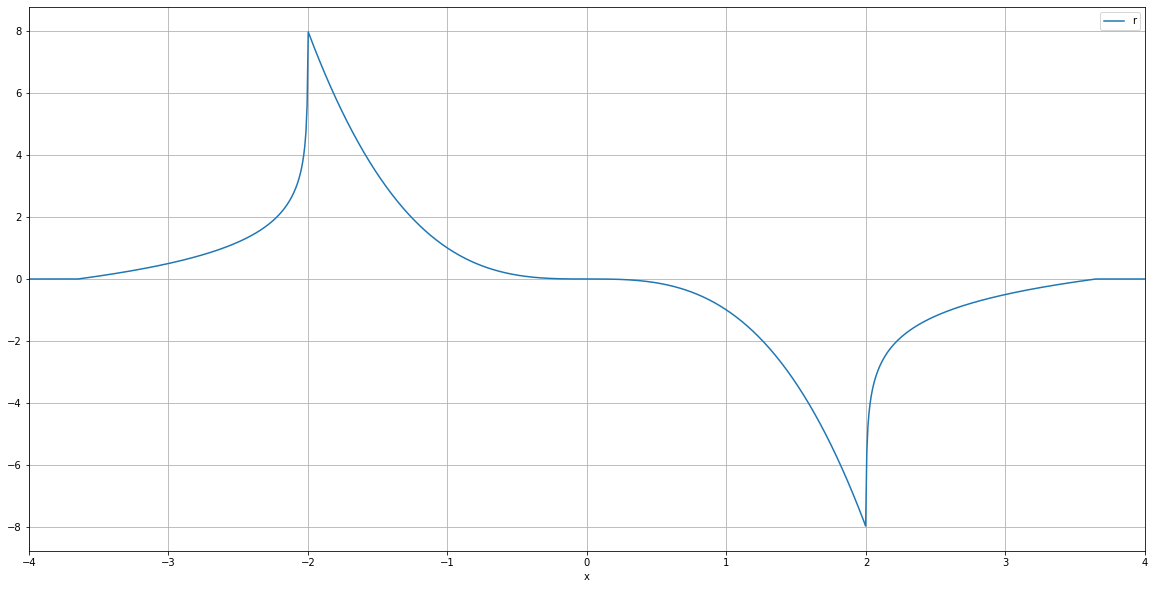

In [129]:
data.set_index('x').plot(figsize=(20,10), grid=True);

In [ ]:
data['x3'] = -data.x ** 3
data['log'] = (np.log(np.abs(data.x) -2) - 1)
data['-log'] = -(np.log(np.abs(data.x) -2) - 1)
data

In [ ]:
data.set_index('x').plot(figsize=(20,8), grid=True);